<a href="https://colab.research.google.com/github/marcellapbp/Aprendendo-Python/blob/master/Alura_Imersao_Dados_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura Imersão Dados 2020
Notebook dedicado às análise realizadas durante o evento da Alura. <br>
A ideia é aprender conceitos e técnicas de Ciências de dados atráves de aulas durante 19-27 de Outubro com base nos dados do INEP sobre o Enem 2019.

##Aula01

In [1]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#consultando dados
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

df = pd.read_csv(fonte)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [3]:
#linhas e colunas
df.shape

(127380, 136)

Dicionário de dados: https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/DICION%C3%81RIO/Dicion%C3%A1rio_Microdados_Enem_2019.xlsx

In [4]:
#descobrindo colunas
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [5]:
#conferindo quais estados estão presentes na amostra
df.SG_UF_NASCIMENTO.value_counts()

SP    19664
MG    13189
BA    10337
RJ     8201
PA     7355
CE     7277
PE     6719
MA     5911
RS     5425
PR     5014
PB     3562
GO     3455
PI     3170
RN     2783
AM     2735
DF     2368
ES     2304
AL     2301
SC     2200
MT     1994
SE     1674
MS     1534
RO     1352
TO     1149
AC      948
AP      840
RR      296
Name: SG_UF_NASCIMENTO, dtype: int64

In [6]:
#verificando idades dos inscritos
df.NU_IDADE.value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Desafio01: Descobrir proporção dos inscritos por idade

(array([53.,  4.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([3.55318171e-05, 7.62548328e-02, 1.52474134e-01, 2.28693435e-01,
        3.04912736e-01, 3.81132037e-01, 4.57351338e-01, 5.33570638e-01,
        6.09789939e-01, 6.86009240e-01, 7.62228541e-01]),
 <a list of 10 Patch objects>)

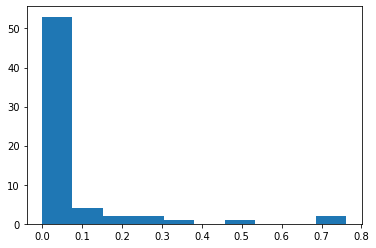

In [7]:
#tentativa 1
Proporcao = (df.NU_IDADE.value_counts().sort_index()/df["NU_IDADE"].sum())*100

#Proporcao
plt.hist(Proporcao)

(array([53.,  4.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([1.00000e+00, 2.14610e+03, 4.29120e+03, 6.43630e+03, 8.58140e+03,
        1.07265e+04, 1.28716e+04, 1.50167e+04, 1.71618e+04, 1.93069e+04,
        2.14520e+04]),
 <a list of 10 Patch objects>)

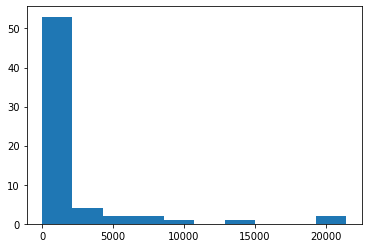

In [8]:
#tentativa 2
plt.hist(df.NU_IDADE.value_counts().sort_index())

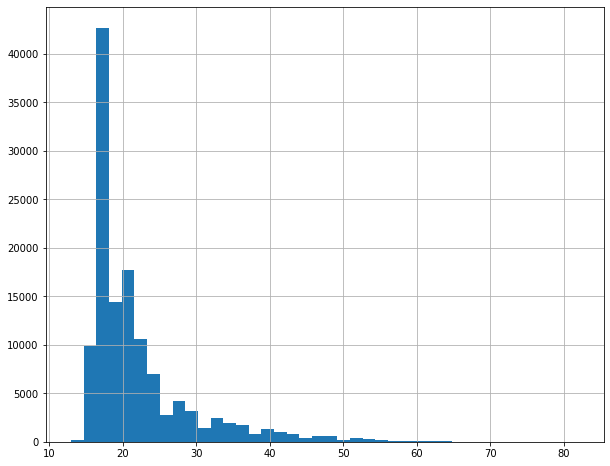

In [9]:
##tentativa 3
#aumentando os bins, pois 13 anos só exitem 4 inscritos, e utilizando o bins padrão distorce a informação
df["NU_IDADE"].hist(bins=40, figsize=(10,8))


Desafio03: Adicionar Titulo no Gráfico

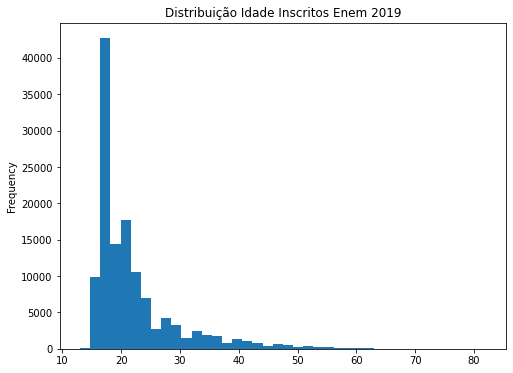

In [10]:
df["NU_IDADE"].plot.hist(bins=40, figsize = (8,6), title="Distribuição Idade Inscritos Enem 2019")

Desafio02: Descobrir de quais estados são os inscritos de 13 anos


In [11]:
  df[df["NU_IDADE"] == 13]["SG_UF_NASCIMENTO"].value_counts()

CE    1
MT    1
SP    1
AP    1
Name: SG_UF_NASCIMENTO, dtype: int64

In [12]:
#selecionando inscritos treineiros
df.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts()

16    7142
17    4901
15    1927
18     858
19     228
20      83
14      64
21      44
22      30
23      21
24      13
26      13
29      10
27       9
25       8
28       6
38       4
40       4
31       4
30       4
42       4
34       3
36       2
39       2
32       2
46       2
44       2
35       2
45       1
41       1
33       1
62       1
48       1
51       1
37       1
47       1
55       1
Name: NU_IDADE, dtype: int64

Desafio04: Plotar histograma dos treineiros por idade

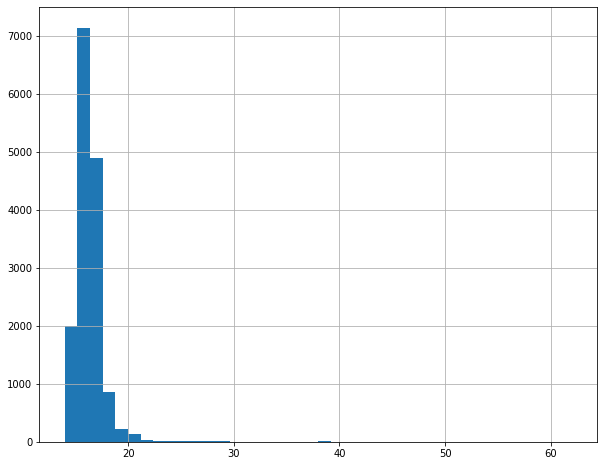

In [13]:
df[df["IN_TREINEIRO"]==1]["NU_IDADE"].hist(bins=40, figsize=(10,8))

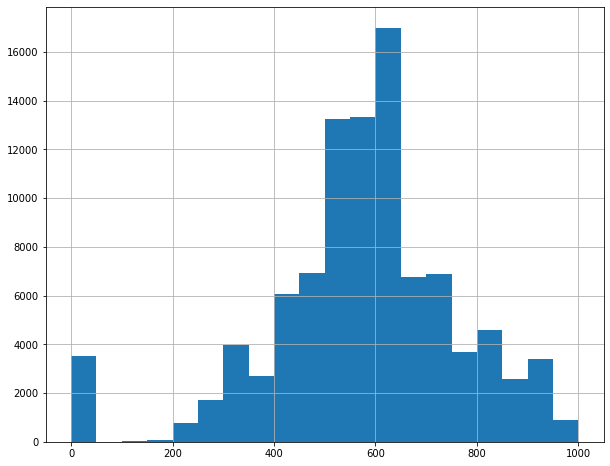

In [14]:
#analisando notas redação
#muitas notas zeros se comparado a outras notas, redação é mais fácil de zerar a nota
df["NU_NOTA_REDACAO"].hist(bins=20, figsize=(10,8))

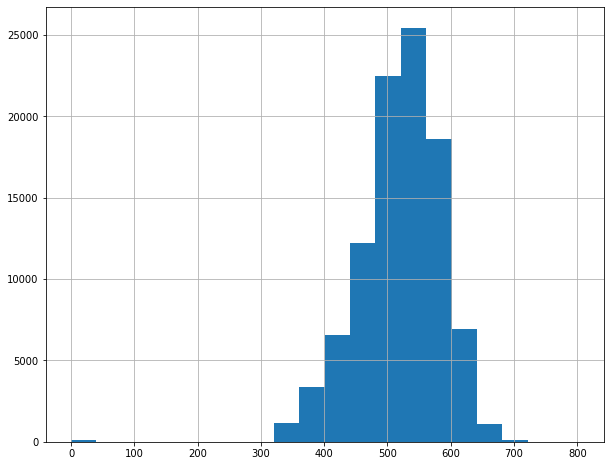

In [15]:
df["NU_NOTA_LC"].hist(bins=20, figsize=(10,8))

In [16]:
#analisar média, desvio padrão e etc
notas = ["NU_NOTA_REDACAO","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_CH","NU_NOTA_CN"]
df[notas].describe()

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN
count,98043.000000,98043.000000,92758.000000,98043.000000,92758.000000
mean,571.570025,520.463928,523.555206,507.365912,477.964015
std,188.076455,64.556578,109.416939,82.972839,76.296099
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,480.000000,483.700000,435.300000,447.900000,418.000000
50%,580.000000,526.100000,501.600000,510.900000,470.200000
75%,680.000000,565.100000,598.200000,567.100000,533.300000
max,1000.000000,801.700000,985.000000,809.400000,797.300000


In [17]:
#exemplo para entender quartis
df["NU_NOTA_LC"].quantile(0.9)
#10% das pessoas tiraram nota acima de 596,3
#Ou outra forma de ler o dado é que 90% das pessoas tiraram menos que 596.3

596.3

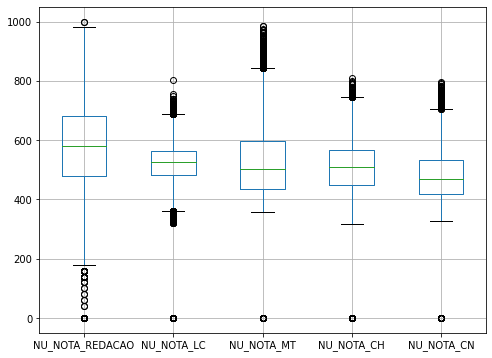

In [18]:
#para analisar visualmente a distribuição das notas, plotar um boxplot

#pontinhos são outliers
#o quadrado representa a concentração da maior parte das notas
#linha no meio do quadrado é a mediana que separa metade dos dados
df[notas].plot.box(figsize=(8,6), grid = True)

Desafio05: Comparar a distribuição das provas em inglês e espanhol

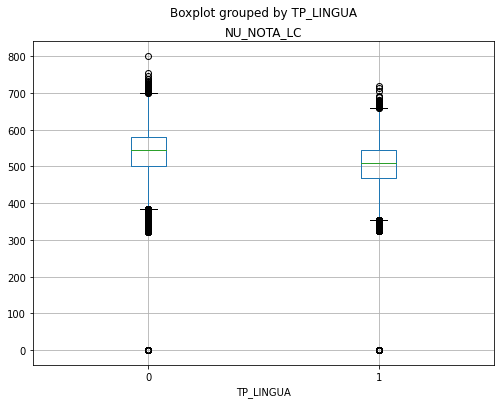

In [19]:
df.boxplot(column="NU_NOTA_LC", by="TP_LINGUA", figsize=(8,6))

Desafio06: Explorar Matplotlib

##Aula02

Desafio01: Descobrir proporção dos inscritos por idade

In [20]:
#opção Normalize de fato normaliza os dados, fazendo que a soma de todos seja 1
#em outras palavras é possível ver o percentual de participação dos inscritos por idade
df["NU_IDADE"].value_counts(normalize=True)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
        ...   
75    0.000016
73    0.000016
82    0.000008
77    0.000008
76    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

In [21]:
df["SG_UF_RESIDENCIA"].value_counts(normalize=True)

SP    0.159083
MG    0.106351
BA    0.078819
RJ    0.066470
CE    0.057945
PA    0.056288
PE    0.054491
MA    0.043515
RS    0.042911
PR    0.041286
GO    0.033506
PB    0.028968
PI    0.023818
RN    0.023230
AM    0.022138
SC    0.020984
ES    0.020019
DF    0.018904
AL    0.017766
MT    0.017507
SE    0.014249
MS    0.012993
RO    0.010991
TO    0.009248
AP    0.008220
AC    0.007427
RR    0.002873
Name: SG_UF_RESIDENCIA, dtype: float64

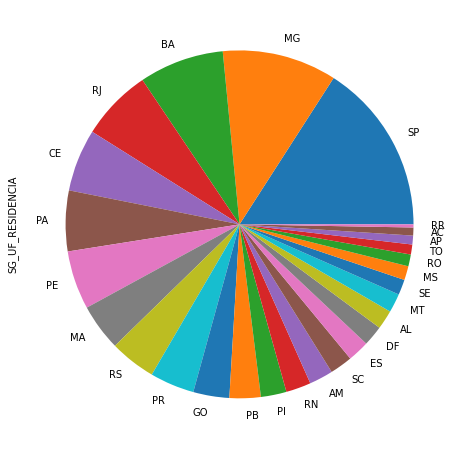

In [22]:
#visualizando os dados da célula anterior
#exemplificando que gráfico de pizza tem uma visualização difícil de visualizar
#por exemplo é dificil de dferenciar RJ, CE e PA
df["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.pie(figsize=(10,8))

Desafio 2: Aumentar a amostra para alunos menor de idade e compara proporção por estado
obs: fiz com toda amostra

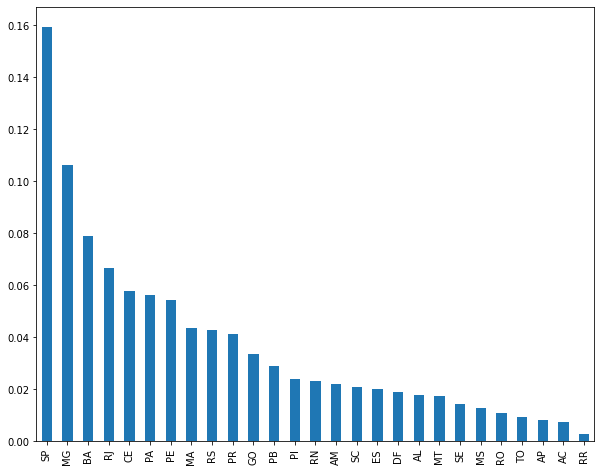

In [23]:
#nessa outra visualização é possível observar que RJ tem na verdade uma vantahem se comparado com CE
#algo que na visualização anterior não era possível perceber
df["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

In [24]:
#importando nova biblioteca para estudo
import seaborn as sns
import matplotlib.pyplot as plt


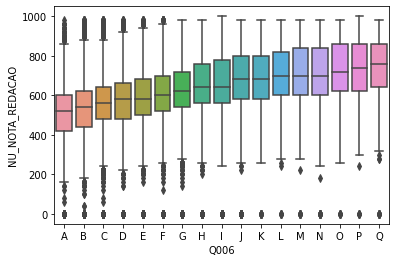

In [25]:
#é possível observar que conforme a renda aumenta, maior a nota
#os outliers acima de 98,5% vão diminuindo pois a nota é um fator limitante
#não é possível ultrapassar mil
renda_ordenada = df["Q006"].unique()
renda_ordenada.sort()
sns.boxplot(x="Q006", y="NU_NOTA_REDACAO", data = df, order = renda_ordenada )

In [26]:
df["NU_NOTA_TOTAL"] = df[notas].sum(axis=1)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


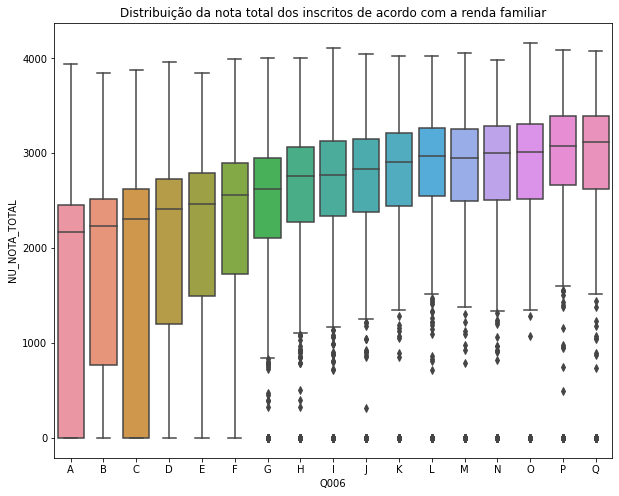

In [27]:
#olhando a somatória de todas notas observamos uma concentração maior de pessoas com baixa renda zerando a nota
renda_ordenada = df["Q006"].unique()
renda_ordenada.sort()
plt.figure(figsize=(10,8))
plt.title("Distribuição da nota total dos inscritos de acordo com a renda familiar")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data = df, order = renda_ordenada )

Desafio 3: Criar uma função para plotar o boxplot do seaborn

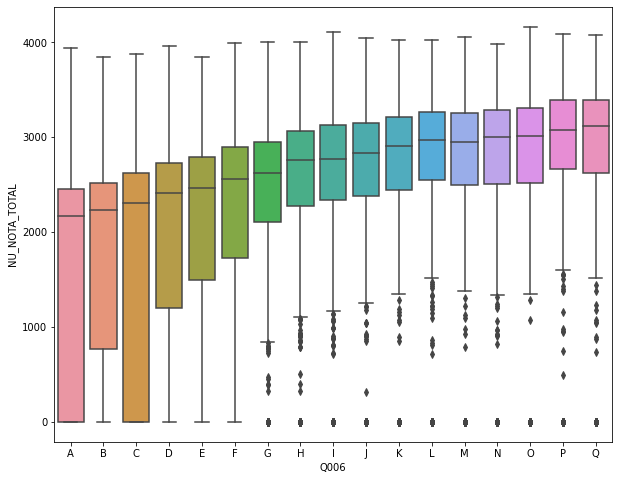

In [28]:
def plotar_boxplot(x,y,ordem,df,titulo):
  plt.figure(figsize=(10,8))
  sns.boxplot(x=x, y=y, data = df, order = ordem )

plotar_boxplot("Q006","NU_NOTA_TOTAL", renda_ordenada, df,"Distribuição da nota total dos inscritos de acordo com a renda familiar")


In [29]:
notas.append("NU_NOTA_TOTAL")

In [30]:
#analisando melhor as notas zero, percebemos que na verdade é um valor nulo
df[df["NU_NOTA_TOTAL"] == 0][notas]

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

In [31]:
#o campo TP_PRESENCA_CN possui o valor 0 quando faltou a prova, 1 quando estava presente e 2 quando foi eliminado
#podemos ver que apenas 5 pessoas da amostra de fato zeraram a prova, os demais faltaram à prova
df[df["NU_NOTA_TOTAL"] == 0]["TP_PRESENCA_CN"].value_counts()

0    29157
1        5
Name: TP_PRESENCA_CN, dtype: int64

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

In [32]:
#parece que na amostra todos foram eliminados no primeiro dia, pois no segundo ficou nulo indicando que a pessoa não compareceu
df[df["TP_PRESENCA_CN"]==2][notas]

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_TOTAL
1784,680.0,485.0,NaN,323.4,NaN,1488.4
2867,480.0,526.6,NaN,466.6,NaN,1473.2
3411,340.0,484.9,NaN,502.7,NaN,1327.6
5970,360.0,471.8,NaN,448.6,NaN,1280.4
15619,800.0,620.7,NaN,618.7,NaN,2039.4
16756,860.0,609.7,NaN,602.9,NaN,2072.6
17035,0.0,396.3,NaN,437.3,NaN,833.6
24936,520.0,584.3,NaN,564.9,NaN,1669.2
25454,760.0,575.5,NaN,643.4,NaN,1978.9
27360,620.0,574.7,NaN,558.3,NaN,1753.0


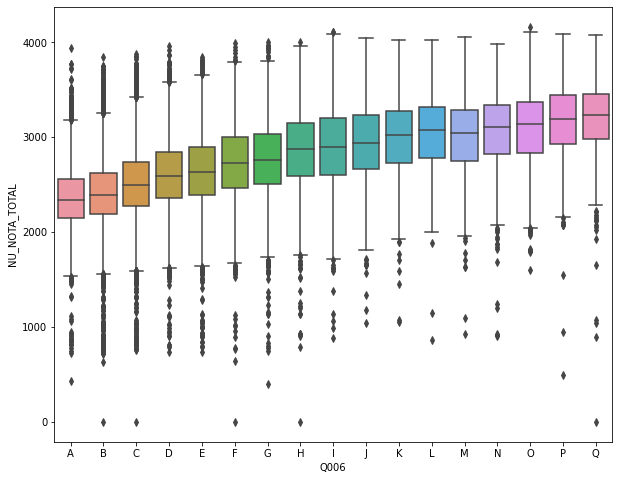

In [33]:
#retirando inscritos que não compareceram em nenhum dia

inscritos_presentes = df[df["TP_PRESENCA_CN"] == 1]
plotar_boxplot("Q006","NU_NOTA_TOTAL", renda_ordenada, inscritos_presentes,"Distribuição da nota total dos inscritos de acordo com a renda familiar")

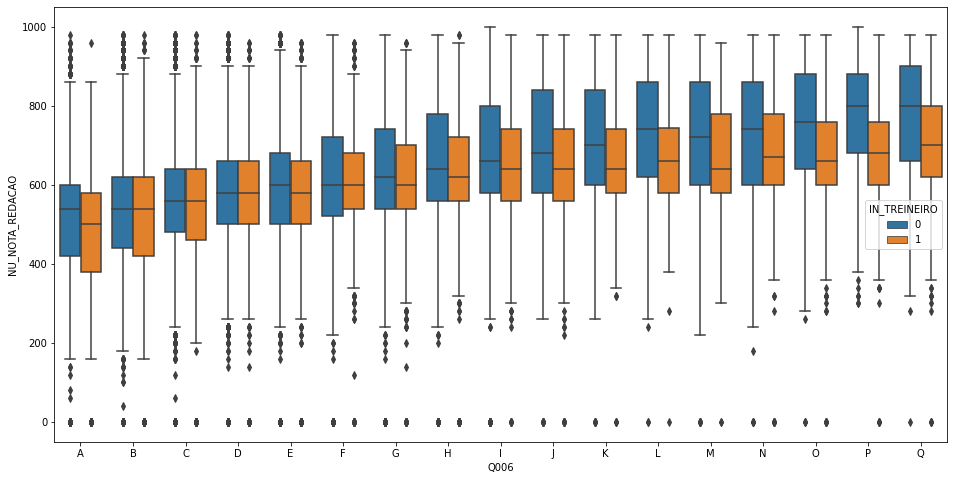

In [34]:
#adicionando uma terceira variável no gráfico utilizando a matiz, onde o próprio gráfico divide pela cor
renda_ordenada = df["Q006"].unique()
renda_ordenada.sort()
plt.figure(figsize=(16,8))
sns.boxplot(x="Q006", y="NU_NOTA_REDACAO", data = inscritos_presentes, order = renda_ordenada, hue="IN_TREINEIRO" )

Desafio 6: Verificar a proporção dos participantes de rendas mais altas como treineiro e não treineiro

In [35]:
inscritos_presentes["IN_TREINEIRO"].groupby(inscritos_presentes["Q006"]).value_counts()

Q006  IN_TREINEIRO
A     0                3542
      1                 475
B     0               19925
      1                2450
C     0               20352
      1                2166
D     0                7942
      1                1038
E     0                7584
      1                1099
F     0                3473
      1                 734
G     0                4950
      1                 947
H     0                3021
      1                 879
I     0                2288
      1                 637
J     0                1301
      1                 423
K     0                 914
      1                 310
L     0                 649
      1                 277
M     0                 634
      1                 280
N     0                 873
      1                 397
O     0                 759
      1                 340
P     0                 604
      1                 336
Q     0                 710
      1                 449
Name: IN_TREINEIRO, dtype: in

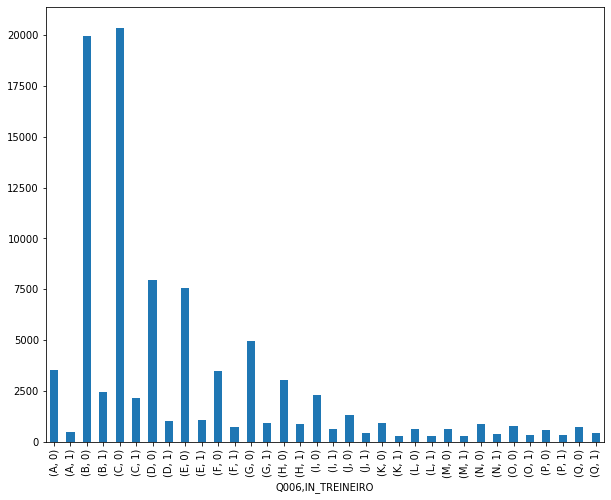

In [36]:
inscritos_presentes["IN_TREINEIRO"].groupby(inscritos_presentes["Q006"]).value_counts().plot.bar(figsize=(10,8))

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

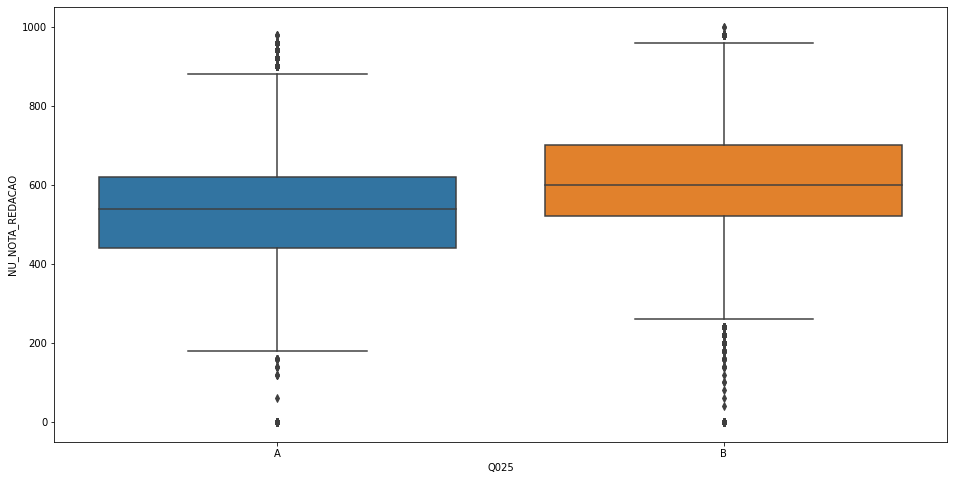

In [37]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Q025", y="NU_NOTA_REDACAO", data = inscritos_presentes, order=['A','B'] )

##Aula03

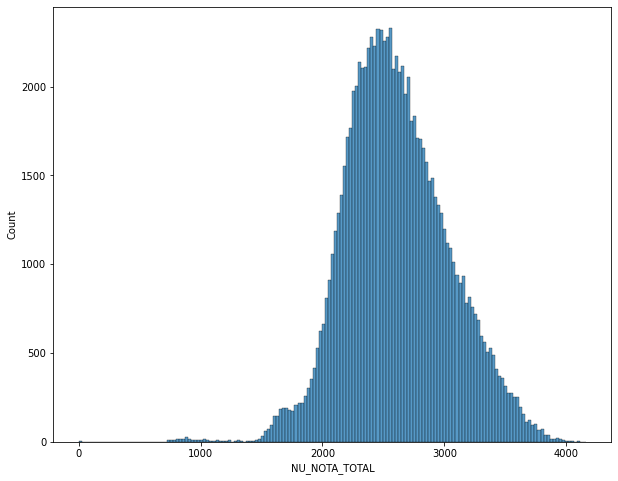

In [38]:
plt.figure(figsize=(10,8))
sns.histplot(inscritos_presentes, x="NU_NOTA_TOTAL")


Desafio 01: Plotar as médias, medianas e moda nas notas de LC e MT

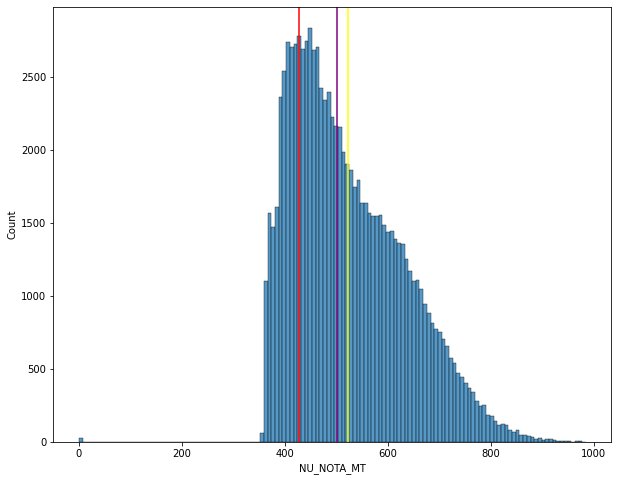

In [39]:
plt.figure(figsize=(10,8))
sns.histplot(inscritos_presentes, x="NU_NOTA_MT")

media= inscritos_presentes["NU_NOTA_MT"].mean()
moda= inscritos_presentes["NU_NOTA_MT"].mode().unique()
mediana= inscritos_presentes["NU_NOTA_MT"].median()

plt.axvline(x=moda, color="red")
plt.axvline(x=mediana, color="purple")
plt.axvline(x=media, color="yellow")


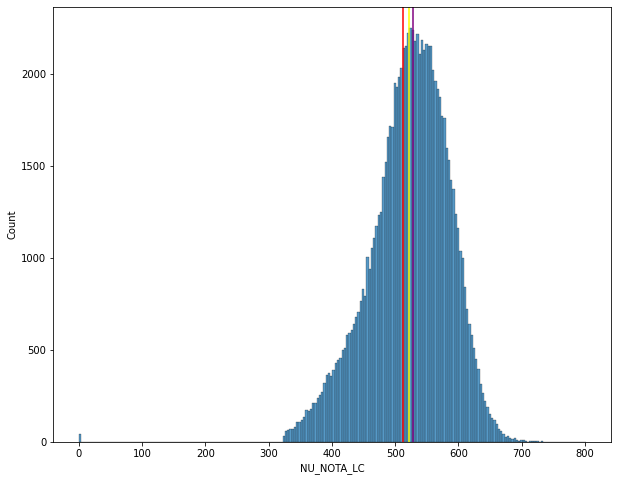

In [40]:
plt.figure(figsize=(10,8))
sns.histplot(inscritos_presentes, x="NU_NOTA_LC")

media= inscritos_presentes["NU_NOTA_LC"].mean()
moda= inscritos_presentes["NU_NOTA_LC"].mode().unique()
mediana= inscritos_presentes["NU_NOTA_LC"].median()

plt.axvline(x=moda, color="red")
plt.axvline(x=mediana, color="purple")
plt.axvline(x=media, color="yellow")


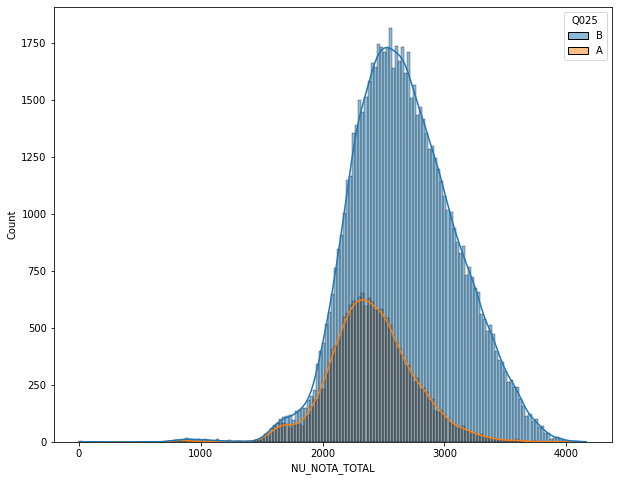

In [41]:
#refazendo a Q025 em histograma

plt.figure(figsize=(10,8))
sns.histplot(data=inscritos_presentes, x="NU_NOTA_TOTAL",hue="Q025", kde=True)
#kde cria uma linha aproximada dos valores para facilitar a visualização

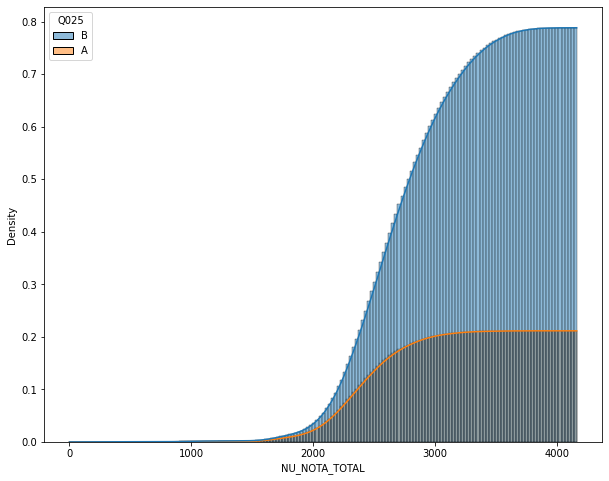

In [42]:
plt.figure(figsize=(10,8))
sns.histplot(data=inscritos_presentes, x="NU_NOTA_TOTAL",hue="Q025", kde=True, stat="density", cumulative=True)
#é possível enxergar em quartis usando o parâmetro cumulative

(-50.0, 1050.0)

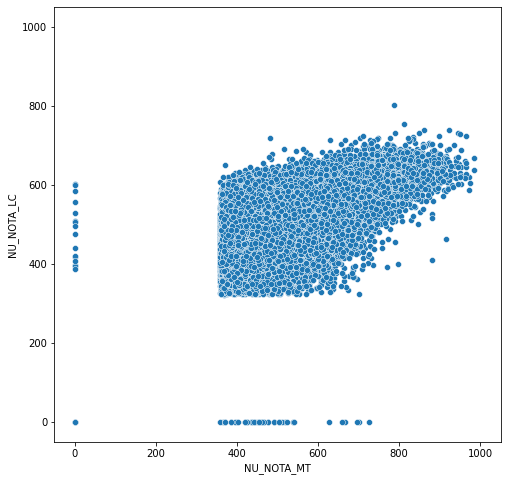

In [43]:
#comparando as notas de duas provas

plt.figure(figsize=(8,8))#deixando gráfico quadrado para não enviesar o resultado
sns.scatterplot(data=inscritos_presentes, x="NU_NOTA_MT", y="NU_NOTA_LC")
#deixando a escala igual nos 2 eixos para também evitar enviesar nossa interpretação
plt.xlim((-50,1050))
plt.ylim((-50,1050))
#esse gráfico foi útil pois estamos comparando duas informações com mesma medida
#a intenção é tentar entender se uma nota cresce em função da outra, mas está muito distribuido 
#não tem uma distribuição muito clara

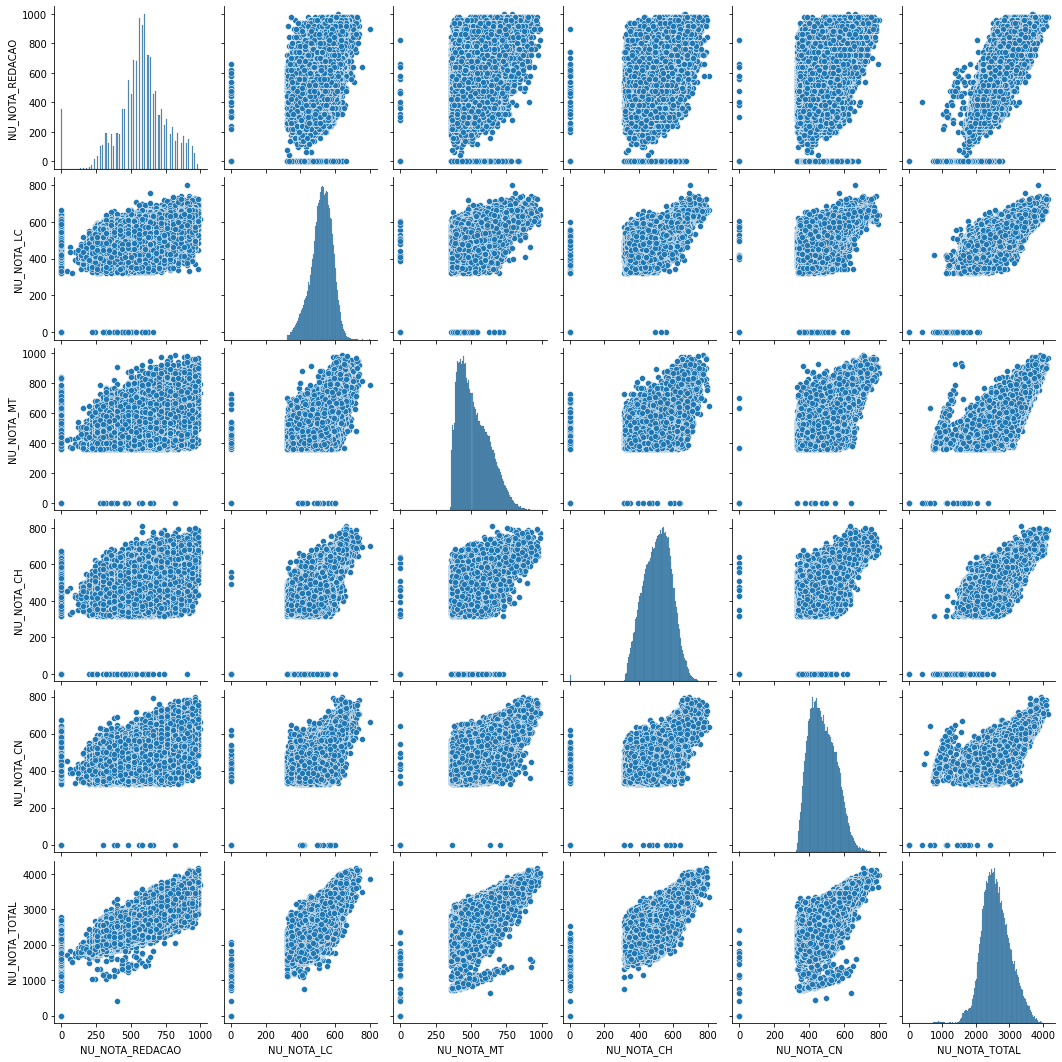

In [44]:
#scatterplot relacionando várias métricas
sns.pairplot(inscritos_presentes[notas])

(-50.0, 1050.0)

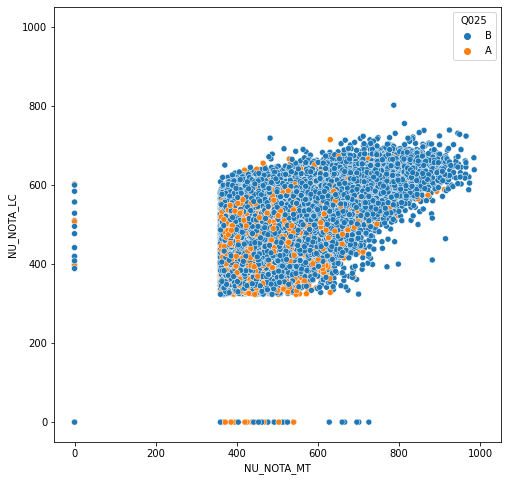

In [45]:
#adicionando uma terceira variável, se a pessoa tem internet ou não
plt.figure(figsize=(8,8))
sns.scatterplot(data=inscritos_presentes, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-50,1050))
plt.ylim((-50,1050))

In [46]:
#checando a correlação (vai de -1 a 1)
correlacao = inscritos_presentes[notas].corr()
correlacao

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_TOTAL
NU_NOTA_REDACAO,1.000000,0.542294,0.493200,0.530824,0.504903,0.840095
NU_NOTA_LC,0.542294,1.000000,0.587986,0.748561,0.641998,0.802490
NU_NOTA_MT,0.493200,0.587986,1.000000,0.610570,0.650055,0.790345
NU_NOTA_CH,0.530824,0.748561,0.610570,1.000000,0.669259,0.819373
NU_NOTA_CN,0.504903,0.641998,0.650055,0.669259,1.000000,0.786043
NU_NOTA_TOTAL,0.840095,0.802490,0.790345,0.819373,0.786043,1.000000


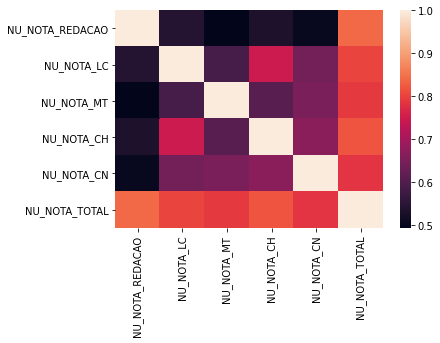

In [47]:
#aproveitando a análise da célula acima, lembrei do heatmap e dá para visualizar melhor a informação acima
sns.heatmap(inscritos_presentes[notas].corr())

#próximo a 1, quando maior uma variável maior a outra também
#próximo a -1, quando maior uma variável a outra diminui

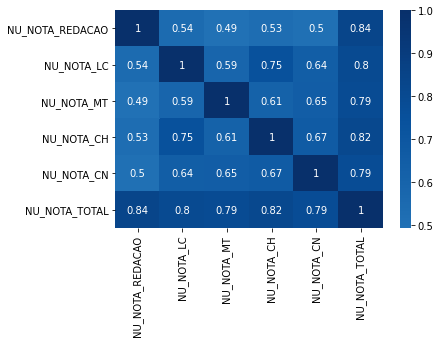

In [48]:
sns.heatmap(inscritos_presentes[notas].corr(), cmap="Blues", center=0, annot=True)
#tentar criar uma matriz na diagonal (para tirar a repetição das notas)

##Aula04

In [66]:
#modelando os dados para aplicar machine learning e tentar prever as notas de MT
provas_entrada = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas_saida = "NU_NOTA_MT"

#removendo nulos para poder rodar o modelo
inscritos_presentes = inscritos_presentes[notas].dropna()

notas_entrada = inscritos_presentes[provas_entrada]
notas_saida = inscritos_presentes[provas_saida]


In [67]:
#mudando nomenclatura para o padrão utilizado em ML
x = notas_entrada
y = notas_saida

In [68]:
#importando modelo que separa teste e treino
from sklearn.model_selection import train_test_split

#manter o mesmo resultado para acompanhar a aula
SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.25, random_state = SEED)
x_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
123902,600.2,654.9,636.4,620.0
12374,610.3,598.2,578.8,720.0
48400,454.5,477.1,467.3,560.0
64680,533.5,569.4,571.8,560.0
83596,505.2,509.4,533.6,600.0


In [69]:
#Regressão Linear
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)#manter o mesmo resultado de aleatoriedade
#treinando o modelo
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [74]:
#gera a previsão
predicao_MT = modelo.predict(x_teste)
predicao_MT

array([592.66135531, 555.87096795, 533.91090974, ..., 390.01796551,
       563.20518617, 475.60375438])

In [75]:
#vendo dados reais
y_teste

42898     777.0
104685    617.2
82370     638.1
40659     471.6
46095     724.6
          ...  
46318     621.5
81292     769.7
119606    476.9
47353     756.1
64686     438.8
Name: NU_NOTA_MT, Length: 23135, dtype: float64

(-50.0, 1050.0)

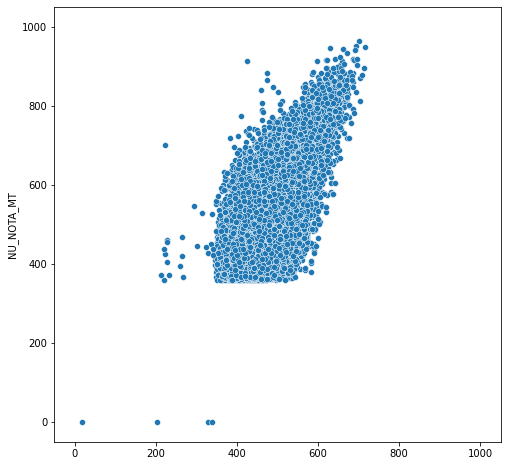

In [78]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=predicao_MT, y=y_teste)
plt.xlim((-50,1050))
plt.ylim((-50,1050))

(-400.0, 400.0)

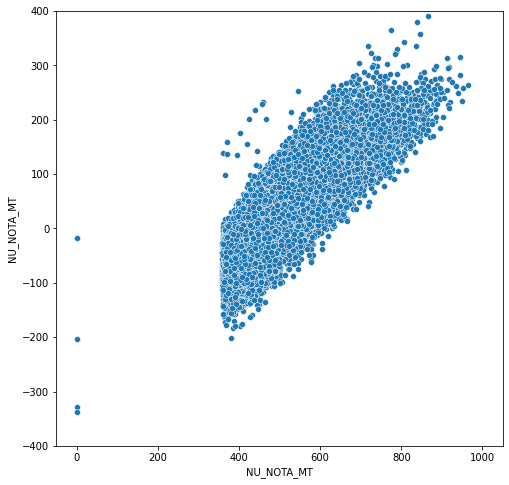

In [86]:
#verificando o valor que a predição errou
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_teste, y=y_teste-predicao_MT)
plt.xlim((-50,1050))
plt.ylim((-400,400))

In [92]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicao_MT
resultados["Diferenca"] = resultados["Real"] - resultados["Previsao"]
#se somar diferenças negativas com positivas para fazer a média pode zerar o valor e parecer que não existe diferença
#elevando ao quadrado resolve esse problema
resultados["Quadrado_Diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [93]:
resultados

,Real,Previsao,Diferenca,Quadrado_Diferenca
42898,777.0,592.661355,184.338645,33980.735925
104685,617.2,555.870968,61.329032,3761.250172
82370,638.1,533.910910,104.189090,10855.366528
40659,471.6,412.415322,59.184678,3502.826130
46095,724.6,567.327674,157.272326,24734.584438
...,...,...,...,...
46318,621.5,517.309437,104.190563,10855.673487
81292,769.7,600.941603,168.758397,28479.396474
119606,476.9,390.017966,86.882034,7548.487917
47353,756.1,563.205186,192.894814,37208.409202


In [94]:
resultados["Quadrado_Diferenca"].mean()**(1/2) #retirando o quadrado
#em média nosso modelo está errando em média 90 pontos

90.82758690469234

In [95]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino,y_treino)

dummy_predicoes =  modelo_dummy.predict(x_teste)


In [96]:
#comparando resultado do modelo anterior com esse mais simples
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

11901.692439827775

In [97]:
mean_squared_error(y_teste, predicao_MT)

8249.650542929467

Desafio01: Procurar outro modelo de ML para treinar e comparar com outros modelos criados em aula
Desafio02: Ler a documentação do Dummy e alterar o método de regressão
Desafio03: Buscar outra métrica para avaliar modelos de regressão

##Aula 05

In [104]:
from sklearn.tree import DecisionTreeRegressor

modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino,y_treino)

predicoes_arvore = modelo_arvore.predict(x_teste)

mean_squared_error(y_teste, predicoes_arvore)

6020.959074272204

In [108]:
#o modelo acima parece ter resolvido o problema da aletoriedade que sem o random_state a gente sofria
#mas o train_test_split tem um fator de aleatoriedade que gera a aleatoriedade
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.25)

modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino,y_treino)

predicoes_arvore = modelo_arvore.predict(x_teste)

mean_squared_error(y_teste, predicoes_arvore)

5987.984656178121

In [112]:
#o ideal é garantir a variedade no teste e treino, para garantir o modelo vai estar preparado
#se eu treinar o modelo para reconhecer um cachorro e no teste eu passar um gato ele não vai ter bom resultado
#então podemos quebrar o dataset em 5 pedaços e treinar várias vezes
#para isso usar o cross validation

from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth = 2)
resultado = cross_validate(modelo_arvore, x, y, scoring="neg_mean_squared_error")#precisamos informar o parâmetro mean_square_error, por padrão usa outro
#automaticamente ele dividiu em 5 partes
resultado
#fica negativo, pois a ideia é manter o conceito de quanto maior o valor (mais perto de zero) melhor

{'fit_time': array([0.06501865, 0.05511332, 0.05905652, 0.05465627, 0.05707407]),
 'score_time': array([0.00208545, 0.00195813, 0.00199533, 0.00202823, 0.00207496]),
 'test_score': array([-6329.37154527, -6390.89060392, -6519.6529336 , -6701.92070777,
        -6863.49700731])}

In [113]:
#estamos focando na métrica de erro, mas o tempo que ele leva para dar a previsão pode ser importante dependendo da regra de negócio
resultado["test_score"]*-1
#os resultado variaram, mas não tanto quanto os testes anteriores
#as variações estão próximas

array([6329.37154527, 6390.89060392, 6519.6529336 , 6701.92070777,
       6863.49700731])

In [116]:
media = (resultado["test_score"]*-1).mean()
media

6561.066559574681

In [119]:
#a média pode criar um valor fora da realidade, por exemplo
#uma turma com notas ou altas e baixas, ou medianas, a média pode ser a mesma (5+5 = 10 ou 9+1= 10 ambos média 5)
#outra forma é calculando desvio padrão ou intervalo de confiança

desvio_padrao = (resultado["test_score"]*-1).std()
desvio_padrao

197.8189024003944

In [121]:
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de Confiança {lim_inferior} - {lim_superior}")

Intervalo de Confiança 6165.428754773892 - 6956.7043643754705


Desafio 01: Pesquisar sobre intervalo de confiança
Desafio 02: Testar com outros parâmetros da árvore de decisão
Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn
Desafio 04: Pesquisar o que é problema de underfit
Desafio 05:  Protar um gráfico com o test_score e train_test

In [ ]:
#tomar cuidado com overfit, quando o modelo de Árvore de Decisão tem profundidade tão grande 
#que fica ruim em generalizar o modelo para os dados que queremos prever
#importante entender demais parâmetros